In [9]:
import numpy as np
import pandas as pd

In [14]:
p_df = pd.read_csv('marketing_customer_analysis_clean.csv')

In [15]:
p_df = p_df.dropna()

In [16]:
p_df.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [17]:
x= p_df[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'months_since_last_claim' ] ]
y= p_df['total_claim_amount']

In [18]:
#standardizing the data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_train_fit = scaler.fit(x_train)
x_test_scaled = x_train_fit.transform(x_test)


In [ ]:
#linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
model = lm.fit(x_train_scaled, y_train)

In [25]:
model.coef_

array([  -4.00755319, -101.71160792,  181.58757796,   -4.97265946,
         -2.41600509,    0.41975188,   -1.33833753])

In [26]:
model.intercept_

434.0622473387925

In [27]:
#predict the total claim amount

In [28]:
x_test_scaled

array([[-0.76043343, -0.35616218, -0.64372705, ..., -0.42923353,
        -0.83292699, -1.13455546],
       [-0.7907347 , -0.5605567 , -0.64372705, ...,  0.70799066,
        -0.83292699, -0.0077106 ],
       [-0.073986  , -1.23962932,  0.40000755, ..., -0.42923353,
         2.08053707, -0.92967458],
       ...,
       [-0.18143387, -1.23962932,  0.05209602, ..., -0.42923353,
         0.83190962, -0.0077106 ],
       [-0.59334724,  1.81207528,  0.19705916, ..., -0.42923353,
        -0.83292699, -1.44187678],
       [ 0.05092055,  1.18606345,  0.31302967, ..., -0.42923353,
         2.49674622,  1.63133646]])

In [29]:
predicted= model.predict(x_test_scaled)

In [30]:
real_pred = pd.DataFrame()
real_pred["real"] = y_test
real_pred["predicted"] = predicted

In [31]:
real_pred

,real,predicted
1250,340.800000,359.900622
5438,195.153339,369.436766
10156,770.400000,633.571062
3441,336.000000,262.323465
682,561.600000,563.439802
...,...,...
5063,345.600000,344.399776
10053,664.280864,638.988004
3453,684.000000,578.855792
9241,25.713622,289.292097


In [ ]:
#calculate the RMSE

In [32]:
from sklearn.metrics import mean_squared_error as mse

In [33]:
np.sqrt(mse(real_pred['real'], real_pred['predicted']))

206.02119667785954

In [ ]:
#plotting

In [34]:
import matplotlib.pyplot as plt

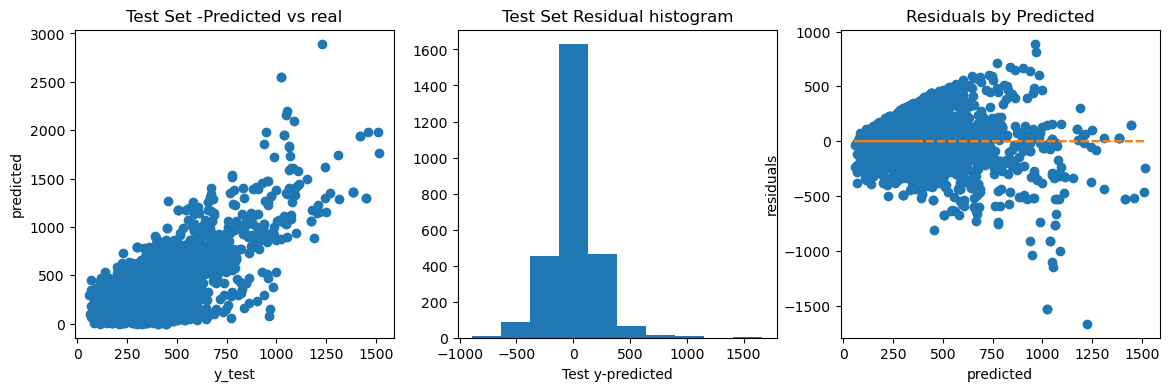

In [41]:
#Plot y_pred vs y_test
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(predicted, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("predicted")
ax[0].set_title("Test Set -Predicted vs real")


#Get a histogram of the residuals i
ax[1].hist(y_test-predicted)
ax[1].set_xlabel("Test y-predicted")
ax[1].set_title("Test Set Residual histogram")


#Homoscedasticity

ax[2].plot(predicted,np.array(predicted)-np.array(y_test),'o')
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(predicted,np.zeros(len(predicted)),linestyle='dashed')

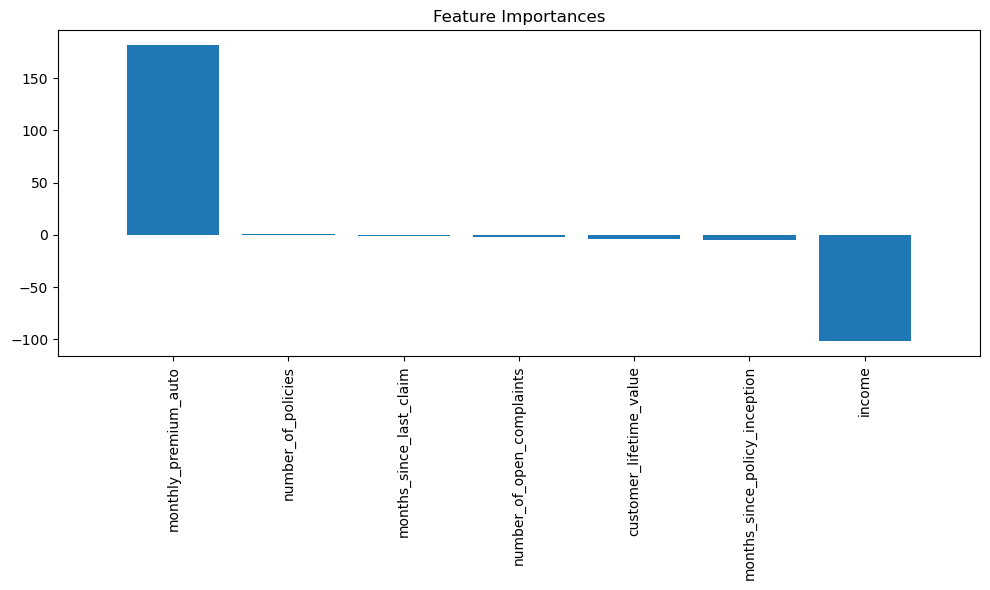

In [44]:
# Get feature importances
feature_importances = pd.Series(model.coef_, index=x.columns)
# Sort and get the indices of features by importance
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()